### **Exploring Diversity Dynamics: A Comparative Analysis of Boards of Directors and Executive Committees**
### Strategic Human Resource Management - Group 7

The purpose of this analysis is to explore the dynamics of diversity within the top leadership structures of organizations, specifically focusing on the **Boards of Directors** and **Executive Committees**. Diversity—measured through dimensions such as gender, nationality, age, education, and seniority—is a critical factor influencing corporate governance, decision-making, and organizational culture. This study aims to determine whether the diversity observed on Boards of Directors aligns with or differs from that on Executive Committees, and whether any patterns of similarity or disparity can be identified.

Additionally, the analysis examines whether the diversity on Boards of Directors affects the diversity on Executive Committees, considering potential phenomena like homophily (similarity among members) or heterophily (diversity among members). Beyond identifying these patterns, the study investigates how external factors such as size of the work force may explain these differences.

The broader objective is to build a typology of employers based on their diversity practices and structures, providing insights into the implications of leadership diversity for organizational success and inclusivity. 

In [36]:
{
    "hide_input": True
}

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, ttest_ind
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Let's start of by taking a look at our datasets and the columns that we are dealing with.

In [37]:

df = pd.read_excel('Data_Cleaned051224.xlsx')  
df = df.iloc[:, :14]
df.head()



,Company Code,Company,Corporate Governance Body,Name,Function,Sex,Nationality,Year of Birth,Age,Highest Degree,Educational Field,Institution,Year in function,Years in the company
0,1,Bayer,Board of Directors,Prof. Dr. Norbert Winkeljohann,Chairman of the Supervisory Board,M,German,1957,67,Phd,Business and Economics,"University of Münster, FernUniversität Hagen",4,4
1,1,Bayer,Board of Directors,Heike Hausfeld,"Vice Chairwoman of the Supervisory Board, Empl...",F,German,1965,59,Master,Mathematics and IT,Bayer AG,2,39
2,1,Bayer,Board of Directors,Dr. Paul Achleitner,Member of the Supervisory Board,M,Austrian,1956,68,Phd,"Business Administration, Economics, Law, Socia...","University of St. Gallen, Harvard Business School",22,22
3,1,Bayer,Board of Directors,Horst Baier,Member of the Supervisory Board,M,German,1956,68,Business Administration,Business Administration,"Leibniz Academy, Continental AG",4,4
4,1,Bayer,Board of Directors,André van Broich,"Member of the Supervisory Board, Employee Repr...",M,German,1970,54,Vocational Training,Chemical Laboratory Technician,Bayer AG,12,36


Below is a description of each column in the dataset:

1. **Company Code**: A unique identifier assigned to each company in the dataset for easy reference.

2. **Company**: The name of the company to which the governance body member belongs.

3. **Corporate Governance Body**: Specifies the governance structure the individual is part of, such as the **Board of Directors** or **Executive Committee**.

4. **Name**: The full name of the individual serving in the governance role.

5. **Function**: The specific role or title held by the individual within the governance body (e.g., CEO, CFO, Non-Executive Director).

6. **Sex**: The gender of the individual, typically categorized as 'M' for male or 'F' for female.

7. **Nationality**: The nationality or citizenship of the individual.

8. **Year of Birth**: The year the individual was born.

9. **Age in 2024**: The calculated age of the individual in 2024, based on their year of birth.

10. **Highest Degree**: The highest academic qualification attained by the individual (e.g., Bachelor’s, Master’s, PhD).

11. **Educational Field**: The field of study associated with the individual's highest degree (e.g., Business, Engineering, Law).

12. **Institution**: The name of the academic institution where the individual earned their highest degree.

13. **Year in Function**: The year the individual began their current role within the governance body.

14. **Years in the Company**: The total number of years the individual has been associated with the company in any capacity.


Now, to proceed with our analysis, let's compare each feature, or measure of diversity, for both the Board of Director and the Executive Committee for each company.

## Gender

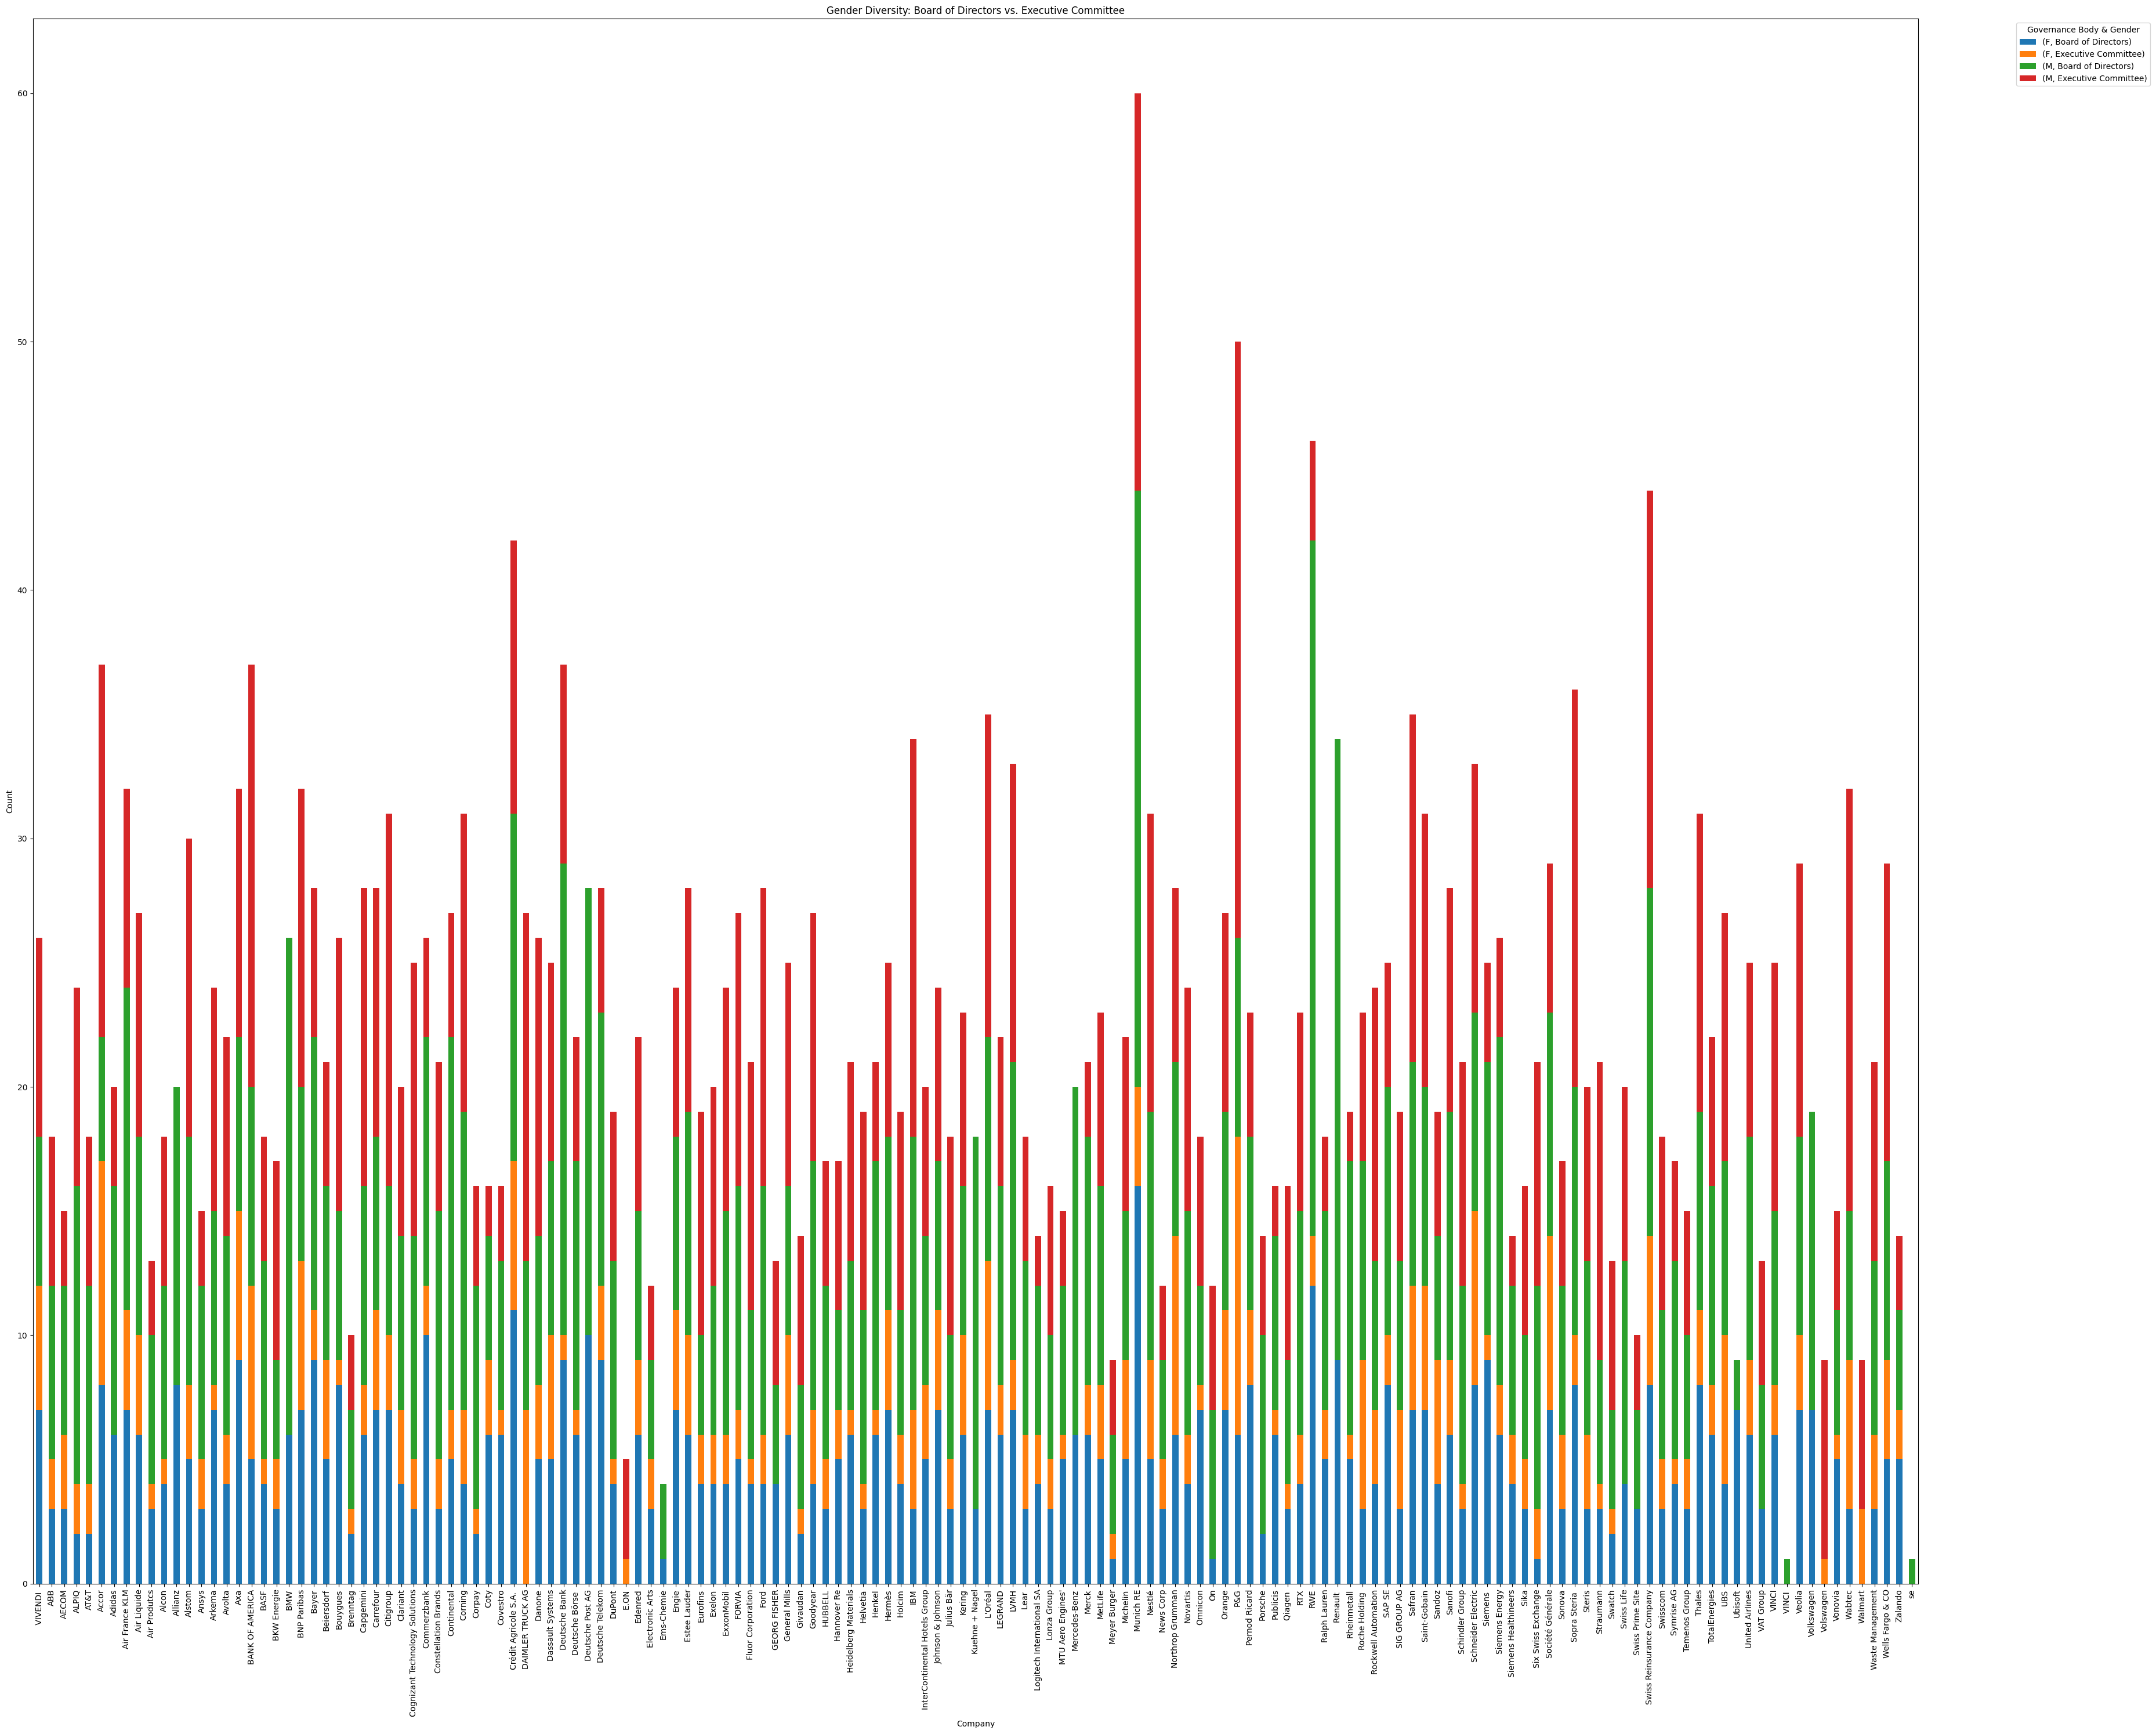

In [38]:
{
    "tags": [
        "hide-input",
    ]
}


# Drop rows with missing values in the specified columns
columns_to_check = ["Company", "Corporate Governance Body", "Sex"]
df_cleaned_selected = df.dropna(subset=columns_to_check)

df=df_cleaned_selected
df["Sex"] = df["Sex"].str.strip()
df["Corporate Governance Body"] = df["Corporate Governance Body"].str.strip()
gender_counts = df.groupby(["Company", "Corporate Governance Body", "Sex"]).size().unstack(fill_value=0)


# Pivot for the stacked bar chart
pivot_data = gender_counts.unstack(level=1).fillna(0)

# Plot stacked bar chart
ax = pivot_data.plot(kind="bar", stacked=True, figsize=(50, 30))

# Customize plot
plt.title("Gender Diversity: Board of Directors vs. Executive Committee")
plt.xlabel("Company")
plt.ylabel("Count")
plt.legend(title="Governance Body & Gender", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

# Enable scrollable view by expanding figure size
plt.subplots_adjust(left=0.2, right=0.85)

# Show plot
plt.show()

As we can see, the data is very large due to the vast amount of companies present in our dataset. Very difficult to interpret! So, we visualise them on average and get the following:

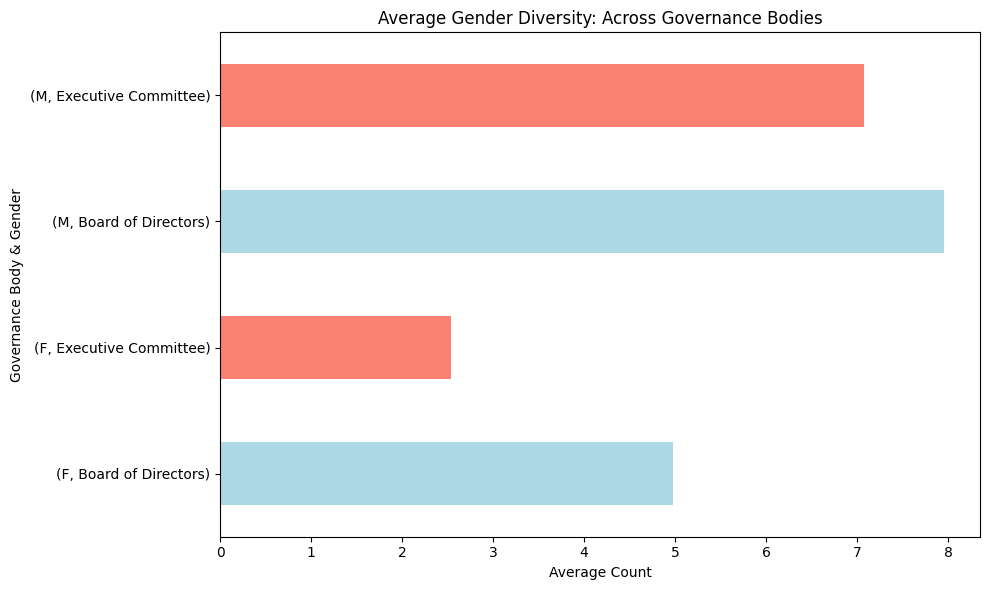

Sex  Corporate Governance Body
F    Board of Directors           4.980132
     Executive Committee          2.536424
M    Board of Directors           7.953642
     Executive Committee          7.072848
dtype: float64

In [39]:
{
    "tags": [
        "hide-input",
    ]
}


average_data = pivot_data.mean()

# Plot the averaged data
fig, ax = plt.subplots(figsize=(10, 6))
average_data.plot(kind="barh", stacked=True, color=["lightblue", "salmon"], ax=ax)

# Customize plot
plt.title("Average Gender Diversity: Across Governance Bodies")
plt.xlabel("Average Count")
plt.ylabel("Governance Body & Gender")
plt.tight_layout()

# Show plot
plt.show()
average_data

Therefore, we can infer that on average...
- There is a higher average count of males compared to females, indicating a male-dominated gender distribution. However, the difference between male and female representation is not as extreme as in the Executive Committee.
- There is a larger gender disparity in the Executive Committee, with males significantly outnumbering females. Female representation is visibly lower compared to their presence on the Board of Directors.
- In comparison, **the Board of Directors appears to have relatively better gender diversity compared to the Executive Committee**. Both governance bodies show male dominance, but the imbalance is more pronounced in the Executive Committee.

It is important to note that in order to **quantitavely measure diversity**, we use the **Shannon Diversity** measure. The Shannon diversity index is a metric commonly used to measure diversity in categorical data, such as the distribution of highest degrees across governance bodies. It quantifies both the richness (number of categories) and evenness (how evenly the members are distributed across these categories). It combines the variety of categories and how uniformly they are represented, providing a holistic view of diversity, it is useful for comparing diversity between groups (e.g., Board of Directors vs. Executive Committee). Also, accounts for minor variations in proportions, give us a nuanced picture of diversity.

## Nationality

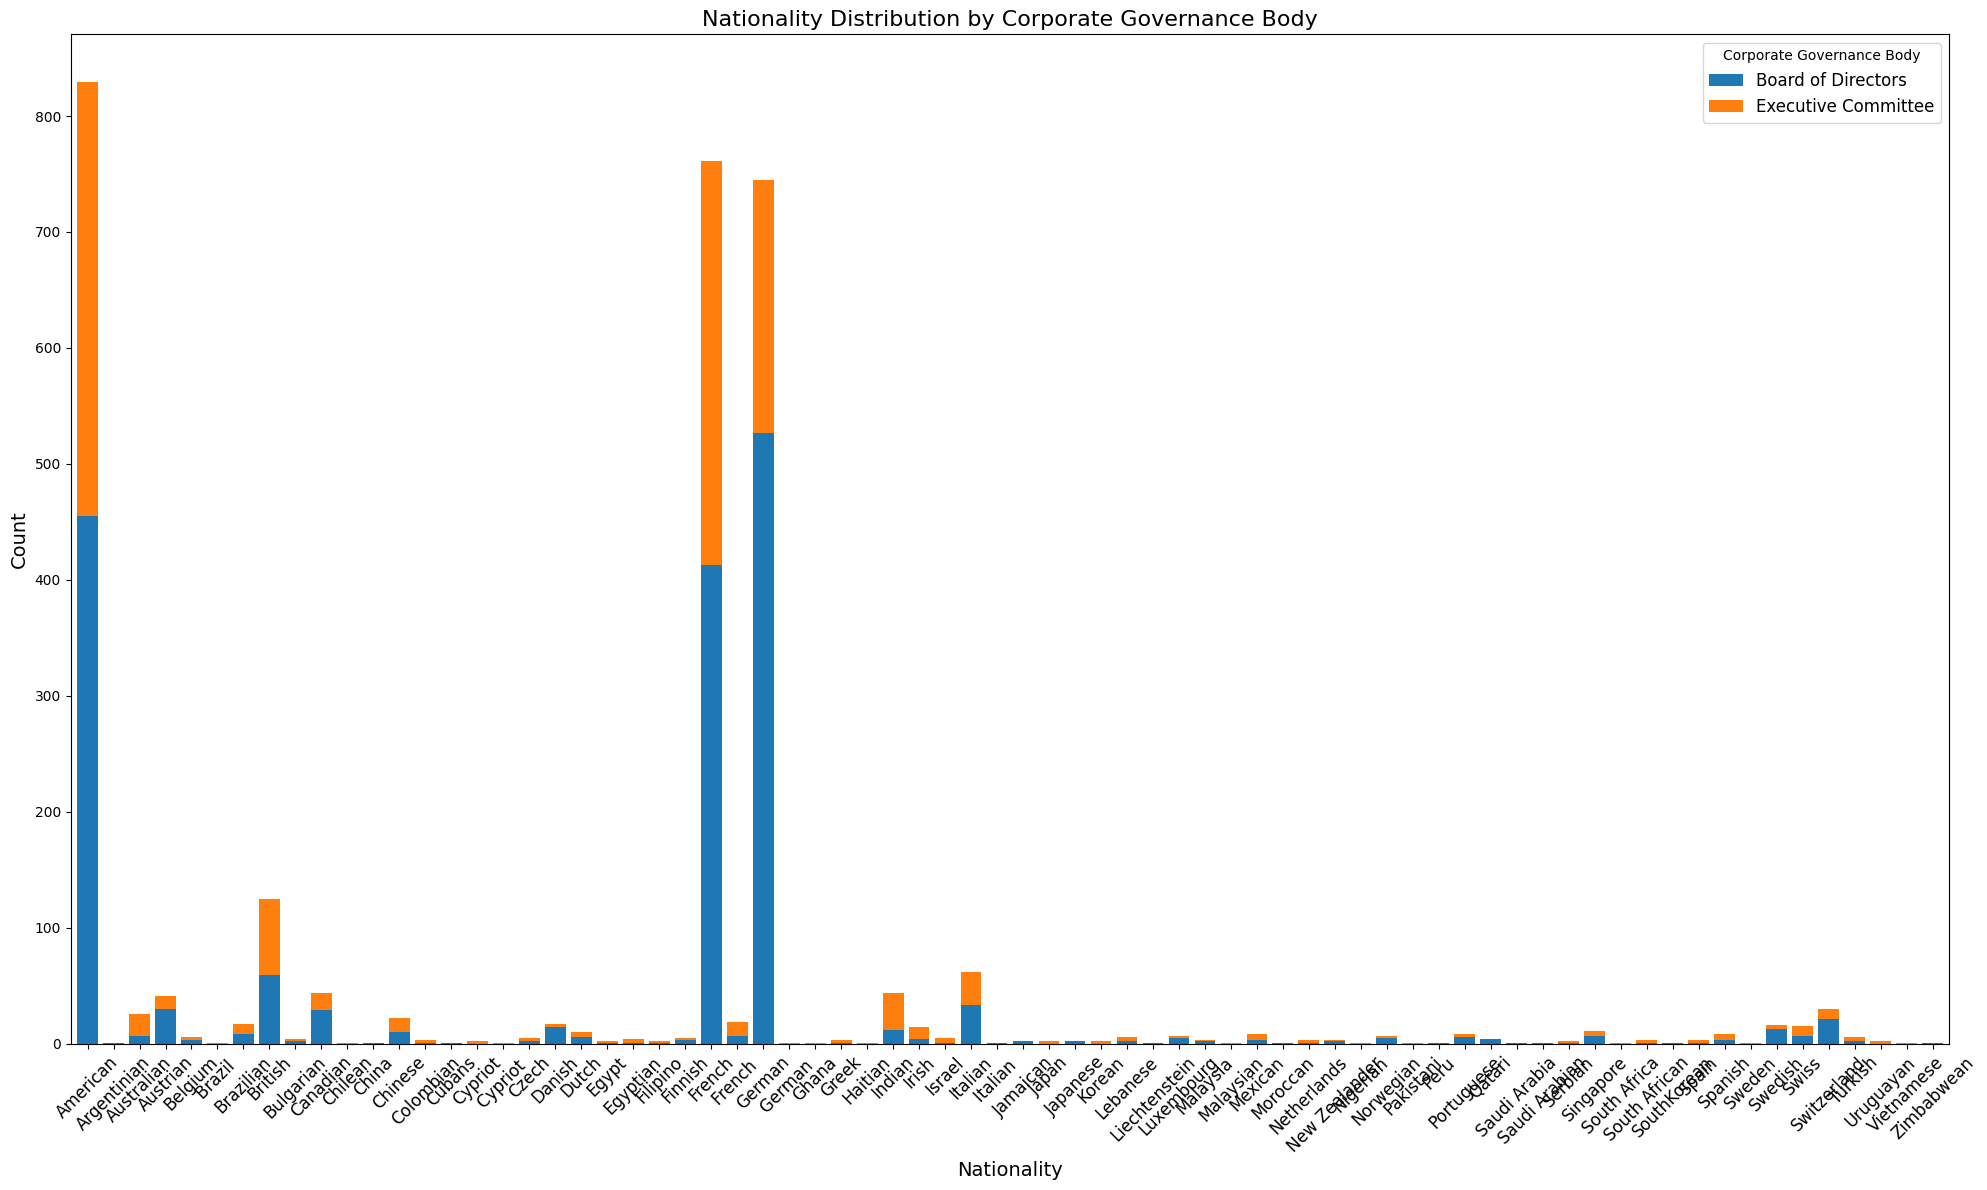

In [40]:

{
    "tags": [
        "hide-input",
    ]
}

nationality_counts = df.groupby(["Nationality", "Corporate Governance Body"]).size().unstack(fill_value=0)
nationality_averages = nationality_counts.mean(axis=0)

def shannon_diversity(counts):
    proportions = counts / counts.sum()
    return -np.sum(proportions * np.log(proportions + 1e-9))

diversity_index = nationality_counts.apply(shannon_diversity, axis=1)


fig, ax = plt.subplots(figsize=(20, 12))
nationality_counts.plot(kind="bar", stacked=True, ax=ax, width=0.8)

# Add titles and labels
plt.title("Nationality Distribution by Corporate Governance Body", fontsize=16)
plt.xlabel("Nationality", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title="Corporate Governance Body", fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()


We notice that there are some countries that have value counts too less to consider, so let's focus on the top 10 nationalities to make the analysis more concise.


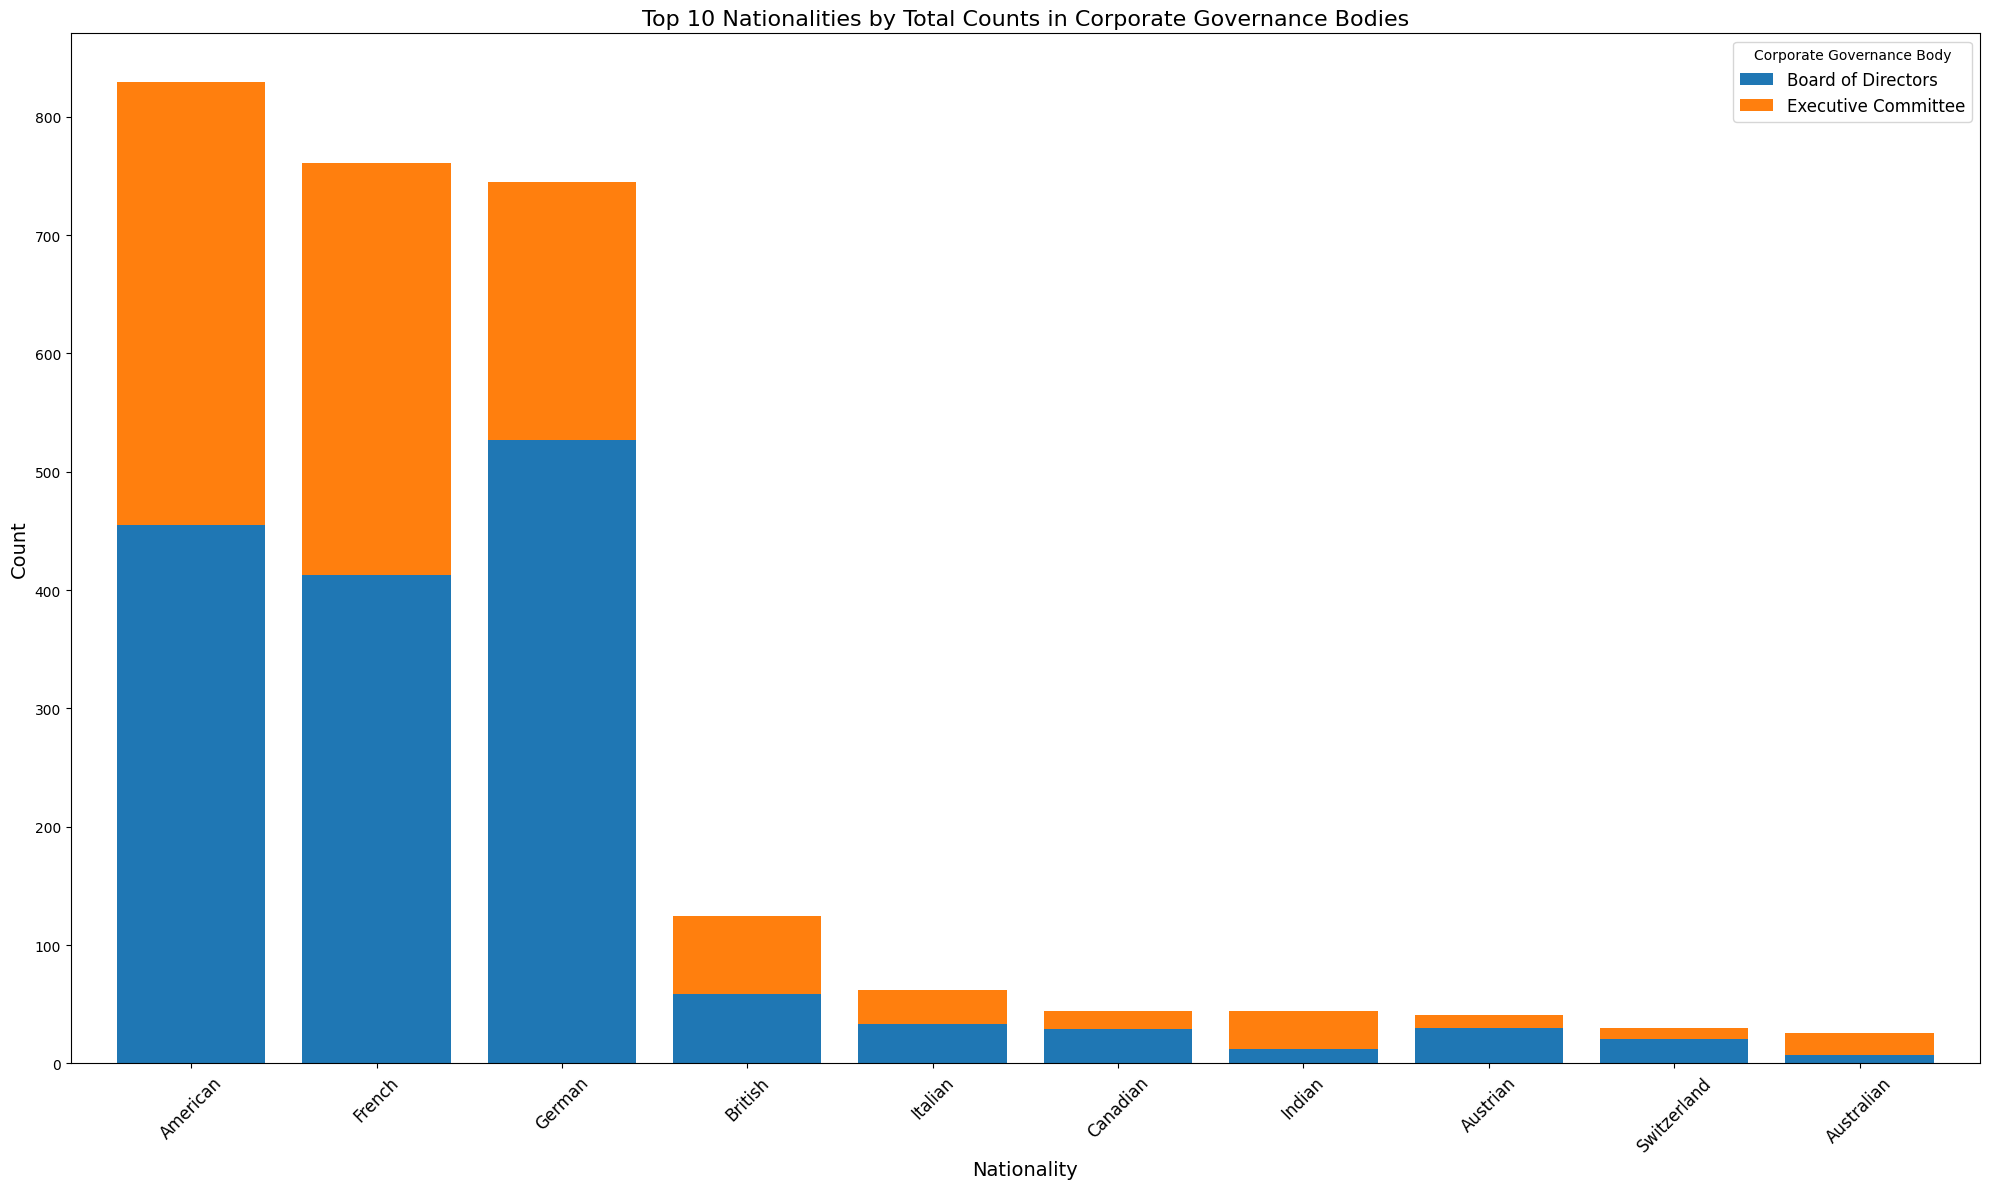

Nationality
American       829
French         761
German         745
British        125
Italian         62
Canadian        44
Indian          44
Austrian        41
Switzerland     30
Australian      26
dtype: int64

In [41]:

{
    "tags": [
        "hide-input",
    ]
}

top_10_counts = nationality_counts.sum(axis=1).nlargest(10)

# Visualization for the top 10 by counts
fig, ax = plt.subplots(figsize=(20, 12))
nationality_counts.loc[top_10_counts.index].plot(kind="bar", stacked=True, ax=ax, width=0.8)

# Add titles and labels
plt.title("Top 10 Nationalities by Total Counts in Corporate Governance Bodies", fontsize=16)
plt.xlabel("Nationality", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title="Corporate Governance Body", fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()

top_10_counts



### Observations:
1. **Dominance of Western Nationalities**:
   - The dominance of **American**, **French**, and **German** nationalities suggests a strong Western-centric representation in leadership roles.
   - These three groups collectively account for the vast majority of leadership positions, overshadowing all other nationalities combined.

2. **Underrepresentation of Non-Western Nationalities**:
   - Nationalities such as **Indian**, **Chinese**, and **Australian** have very low representation, indicating a lack of diversity from non-Western countries.

3. **Geographic and Operational Influence**:
   - The dominance of Western nationalities could reflect the headquarters' location or operational focus of the companies, which may skew representation toward local talent pools.

4. **Global Inclusivity**:
   - The underrepresentation of nationalities from Asia (e.g., **Chinese**, **Indian**) and other regions highlights a potential gap in inclusive global leadership strategies.



## Education

Now let's move on to education.

In [42]:
{
    "tags": [
        "hide-input",
    ]
}

# Function to classify the highest degree into four categories
def classify_highest_degree_category(degree):
    if pd.isnull(degree) or str(degree).strip() == "":
        return "Other"  # Count empty or null values as "Other"
    degree_lower = str(degree).lower()
    if "bachelor" in degree_lower or "b.sc." in degree_lower or "bsc" in degree_lower or "bachelor " in degree_lower or "bachelor" in degree_lower :
        return "Bachelor"
    elif "master" in degree_lower or "mba" in degree_lower or "executive master" in degree_lower:
        return "Master"
    elif "phd" in degree_lower or "ph.d" in degree_lower or "post-doctoral" in degree_lower:
        return "PhD"
    else:
        return "Other"

# Apply the classification function to the 'Highest Degree' column
df['Highest Degree'] = df['Highest Degree'].apply(classify_highest_degree_category)

# Count the categories
degree_counts = df['Highest Degree'].value_counts()

# Display the counts
print(degree_counts)



Highest Degree
Master      1697
Other        639
Bachelor     571
PhD          497
Name: count, dtype: int64


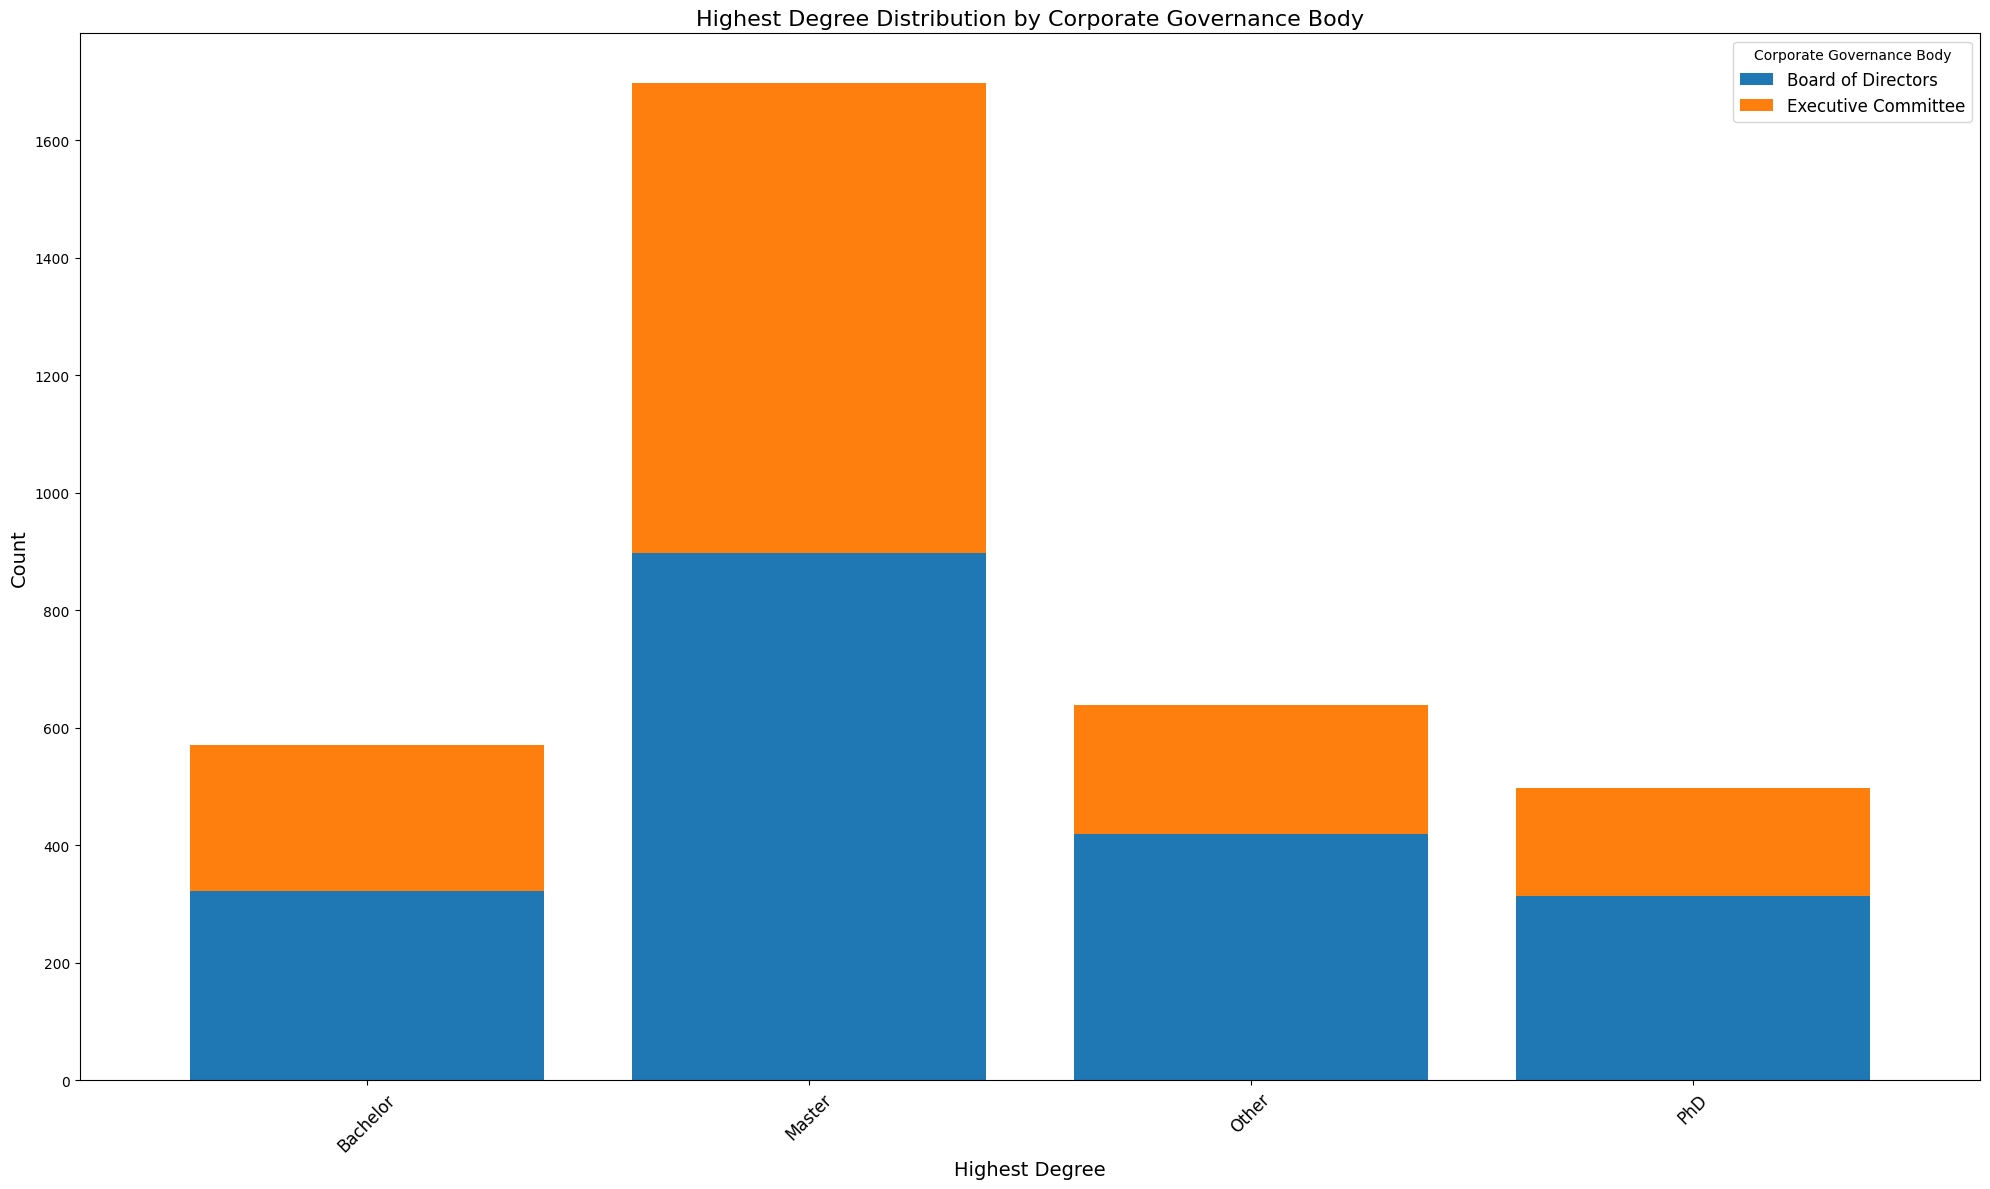

Corporate Governance Body,Board of Directors,Executive Committee
Highest Degree,,
Bachelor,322,249
Master,898,799
Other,419,220
PhD,314,183


In [43]:
{
    "tags": [
        "hide-input",
    ]
}

degree_counts = df.groupby(["Highest Degree", "Corporate Governance Body"]).size().unstack(fill_value=0)
degree_averages = degree_counts.mean(axis=0)

diversity_index = degree_counts.apply(shannon_diversity, axis=1)

fig, ax = plt.subplots(figsize=(20, 12))
degree_counts.plot(kind="bar", stacked=True, ax=ax, width=0.8)


plt.title("Highest Degree Distribution by Corporate Governance Body", fontsize=16)
plt.xlabel("Highest Degree", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title="Corporate Governance Body", fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()
degree_counts 



### Observations:
1. **Bachelor's Degrees**:
   - The **Board of Directors** has 289 members with a Bachelor's degree, while the **Executive Committee** has 211.
   - This suggests that individuals with a Bachelor's degree are more prevalent in the **Board of Directors** compared to the Executive Committee.

2. **Master's Degrees**:
   - Master's degrees dominate both governance bodies, with 793 in the **Board of Directors** and 689 in the **Executive Committee**.
   - This indicates that a Master's degree is the most common educational qualification for top leadership roles in both bodies.

3. **PhD Degrees**:
   - There are 275 PhD holders in the **Board of Directors**, compared to 161 in the **Executive Committee**.
   - The **Board of Directors** shows a higher representation of individuals with advanced academic qualifications.

4. **Other Qualifications**:
   - A significant number of "Other" qualifications are observed, with 377 in the **Board of Directors** and 195 in the **Executive Committee**.
   - This category might include vocational training, certifications, or unclassified degrees, which appear to have a notable presence, particularly in the Board of Directors.


### Some interesting insights:
1. **Higher Academic Credentials in the Board of Directors**:
   - The **Board of Directors** tends to have individuals with higher academic qualifications (Master's and PhDs) compared to the **Executive Committee**, suggesting that advanced degrees might be a more important criterion for governance roles than operational roles.

2. **Practical Experience in the Executive Committee**:
   - The **Executive Committee** has fewer PhDs and "Other" qualifications, indicating a potential emphasis on practical experience or managerial expertise over academic credentials.

3. **Master's Degree as the Standard**:
   - The dominance of Master's degrees in both governance bodies highlights its status as the most common entry requirement for top-level leadership roles.


## Age (as of 2024)

In [ ]:
{
    "tags": [
        "hide-input",
    ]
}

# Data Cleaning
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')


89.0


c:\Users\irajn\anaconda3\lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


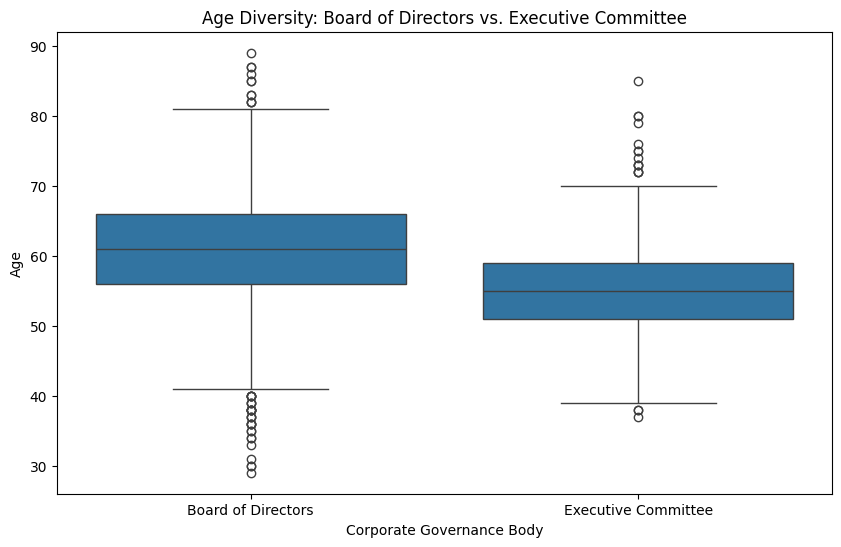

In [45]:
{
    "tags": [
        "hide-input",
    ]
}
# Boxplot for Age Diversity
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Corporate Governance Body", y="Age")
plt.title("Age Diversity: Board of Directors vs. Executive Committee")
plt.ylabel("Age")
plt.xlabel("Corporate Governance Body")
plt.show()



### Observations:
1. **Median Age**:
   - The **Board of Directors** has a higher median age compared to the **Executive Committee**, indicating that members of the Board tend to be older.

2. **Age Range**:
   - The **Board of Directors** shows a wider age range, with several outliers on both the lower and higher ends.
   - The **Executive Committee** has a more compact age range, suggesting less variability in the ages of its members.

3. **Interquartile Range (IQR)**:
   - The IQR (middle 50% of the data) is larger for the **Board of Directors**, indicating greater variation in the typical ages of its members.
   - The **Executive Committee** has a narrower IQR, meaning the ages are more concentrated around the median.

4. **Outliers**:
   - The **Board of Directors** has several outliers at the lower end (younger members) and some at the higher end (older members), highlighting diversity in age.
   - The **Executive Committee** has fewer outliers, suggesting a more uniform age distribution.

### Interpretation:
- **Board of Directors**:
  - The broader age range and higher median suggest that the Board values experience and may include older members with extensive professional backgrounds.
  - The presence of younger outliers may indicate a trend toward including fresh perspectives or younger leadership voices.

- **Executive Committee**:
  - The tighter age range and lower median age suggest a preference for younger, more operationally active members, possibly reflecting the demands of the role.

- **Generational Mix**:
  - The **Board of Directors** benefits from a generational mix, potentially offering diverse perspectives.
  - The **Executive Committee** might prioritize age groups that align with strategic execution capabilities.

- **Succession Planning**:
  - The presence of younger outliers in the **Board of Directors** could be part of succession planning to groom future leaders.


In [46]:
{
    "tags": [
        "hide-input",
    ]
}

# Data Cleaning
df['Years in the company'] = pd.to_numeric(df['Years in the company'], errors='coerce')

C:\Users\irajn\AppData\Local\Temp\ipykernel_1780\2966033542.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Years in the company'] = pd.to_numeric(df['Years in the company'], errors='coerce')


## Seniority (Years in the Company)

c:\Users\irajn\anaconda3\lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


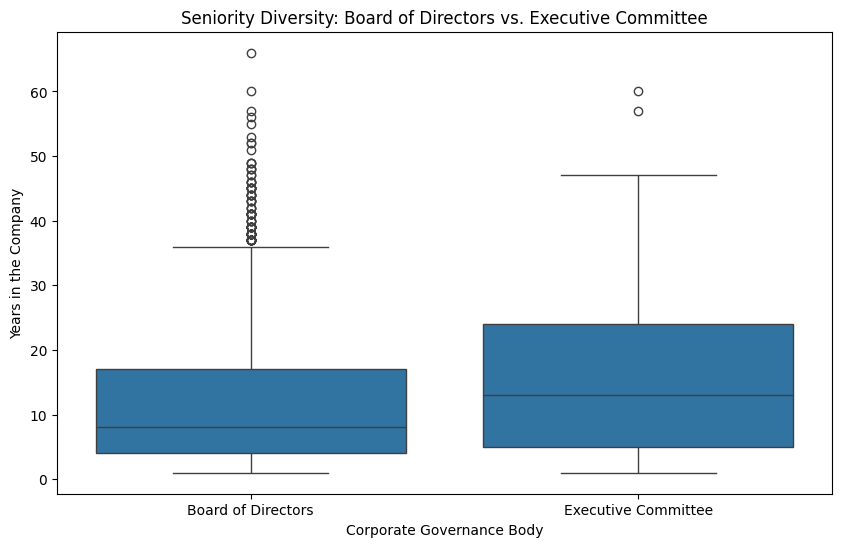

In [47]:
{
    "tags": [
        "hide-input",
    ]
}
# Boxplot for Seniority
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Corporate Governance Body", y="Years in the company")
plt.title("Seniority Diversity: Board of Directors vs. Executive Committee")
plt.ylabel("Years in the Company")
plt.xlabel("Corporate Governance Body")
plt.show()


### Observations:
1. **Median Seniority**:
   - The **Executive Committee** shows a slightly higher median for years in the company compared to the **Board of Directors**.
   - This suggests that members of the Executive Committee tend to have longer tenures within the organization.

2. **Interquartile Range (IQR)**:
   - The **Board of Directors** has a wider IQR, indicating greater variability in the seniority of its members.
   - The **Executive Committee** has a narrower IQR, suggesting a more consistent level of seniority among its members.

3. **Outliers**:
   - The **Board of Directors** shows a large number of outliers, with members having exceptionally long tenures (40+ years). This reflects the inclusion of long-serving individuals, possibly founders, advisors, or legacy members.
   - The **Executive Committee** also has some outliers, though fewer compared to the Board of Directors.

4. **Overall Range**:
   - Both governance bodies have members with short and long tenures, but the **Board of Directors** exhibits a broader range, extending to higher seniority levels.


### Interpretation:
- **Board of Directors**:
  - The diversity in seniority suggests a mix of newly appointed members and long-serving individuals, likely to balance fresh perspectives with historical continuity.
  - The high number of outliers indicates the presence of individuals with exceptional tenure, who might hold advisory or non-executive roles.

- **Executive Committee**:
  - The higher median and narrower range suggest that seniority is a critical factor for membership, reflecting the operational experience and institutional knowledge required for these roles.

1. **Experience vs. Fresh Perspectives**:
   - The **Board of Directors** appears to prioritize a mix of experienced and newer members, possibly to encourage diversity of thought in governance.
   - The **Executive Committee** leans more heavily on operational experience and continuity.

2. **Retention and Succession**:
   - The presence of long-serving members in both bodies highlights the need for succession planning to ensure smooth transitions in leadership.

3. **Role of Outliers**:
   - The outliers in seniority may play specialized roles, such as advising on legacy issues or ensuring stability during strategic shifts.

### *Does the diversity (gender, nationality, age, education, seniority) of the Board of Directors differ or is it similar to the diversity on the Executive Committee?*
- **Gender**: Boards of Directors tend to have slightly higher gender diversity than Executive Committees, with more balanced representation of males and females.
- **Nationality**: Boards of Directors exhibit greater nationality diversity (higher nationality entropy) compared to Executive Committees, which often have more localized representation.
- **Age**: The Board of Directors shows a wider age range with older median ages, while Executive Committees have a more concentrated age distribution with younger medians.
- **Education**: Boards generally have a higher proportion of PhD holders, while Executive Committees tend to have more Master's degree holders, reflecting operational focus over academic credentials.
- **Seniority**: Members of the Board of Directors often have longer company tenures and seniority outliers compared to Executive Committee members, who typically have shorter, more uniform tenures.


### *Does diversity (or similarity) on the Board of Directors affect diversity on the Executive Committee?*
- **Positive Correlation**: Statistical analysis shows that diversity on the Board of Directors positively influences the diversity of the Executive Committee:
  - Companies with gender-diverse Boards are more likely to have gender-diverse Executive Committees.
  - Nationality diversity on the Board correlates with greater nationality diversity on the Executive Committee.
- **Cascading Impact**: The Board of Directors often sets a precedent for inclusivity, creating a trickle-down effect on Executive Committees.
- **Variability in Influence**:
  - The effect is strongest for gender and nationality.
  - The influence is weaker for age and seniority, where other operational priorities might play a greater role.


### *Do we find any homophily or heterophily?*
We find instances of both homophily and heterophily.
- **Homophily**:
  - **Gender**: There is evidence of gender homophily, where a male-dominated Board correlates with a male-dominated Executive Committee.
  - **Nationality**: Nationality homophily is present in organizations with localized Boards and Committees, especially in smaller or regionally focused companies.
- **Heterophily**:
  - **Age**: Boards often exhibit more heterophily in age, mixing experienced older members with younger members, compared to the uniform age distribution of Executive Committees.
  - **Seniority**: Boards demonstrate heterophily in seniority, with a mix of newly appointed members and long-serving advisors.


### *Differences and Impact of Factors*
- **Industry**:
  - Innovative sectors (e.g., tech, pharmaceuticals) tend to have higher gender and nationality diversity in both Boards and Committees.
  - Traditional industries (e.g., manufacturing) show lower overall diversity.
- **Country**:
  - Companies based in countries with progressive diversity laws (e.g., Scandinavian countries) outperform those in regions with less stringent inclusivity requirements.
  - Western-based companies have higher representation of certain nationalities compared to non-Western counterparts.
- **Size of Employer**:
  - Larger multinational companies exhibit higher diversity due to global operations and compliance with broader regulatory frameworks.
  - Smaller or local companies often have lower diversity, with a stronger focus on local representation.


### *We build a typology based on composite diversity scores*
- **Highly Diverse**:
  - Companies excelling in all diversity metrics, often multinational with innovation-driven cultures.
- **Diverse**:
  - Organizations with balanced diversity across most dimensions but with room for improvement.
- **Less Diverse**:
  - Firms showing moderate diversity, typically in traditional industries with limited global exposure.
- **Not Diverse**:
  - Companies with low diversity scores, likely influenced by regional, cultural, or industry-specific norms.


The analysis confirms differences and similarities in diversity between Boards of Directors and Executive Committees across multiple dimensions. It highlights the Board's role in influencing Executive Committee diversity and explains these patterns through organizational, industry, and geographic factors. The typology categorizes employers based on diversity performance, providing actionable insights for promoting inclusivity in corporate governance.